# Self-Driving Car Engineer Nanodegree


## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

# Load pickled data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

Visualization of the German Traffic Signs Dataset using the pickled file(s) and check on classes images distribution on each set.

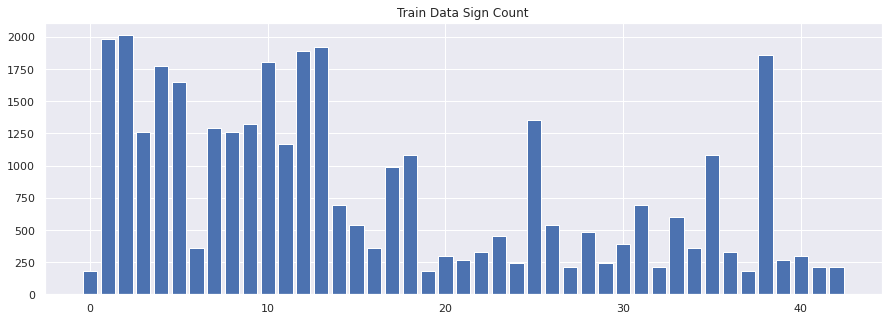

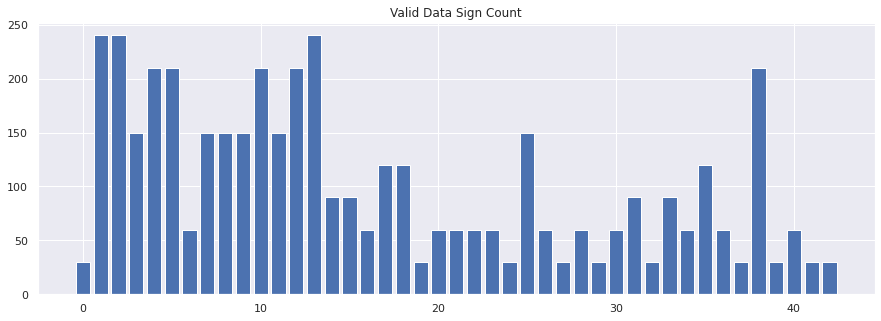

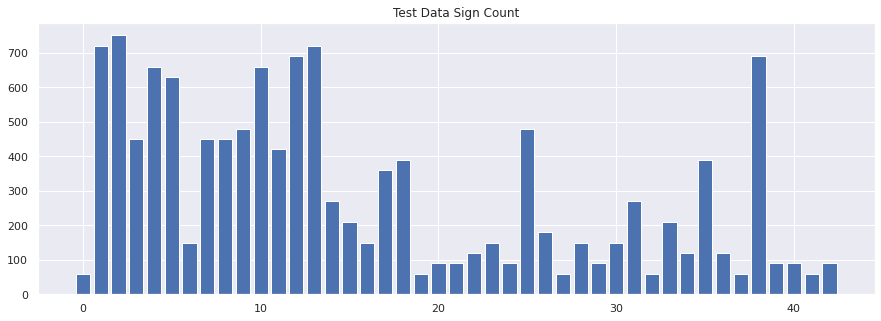

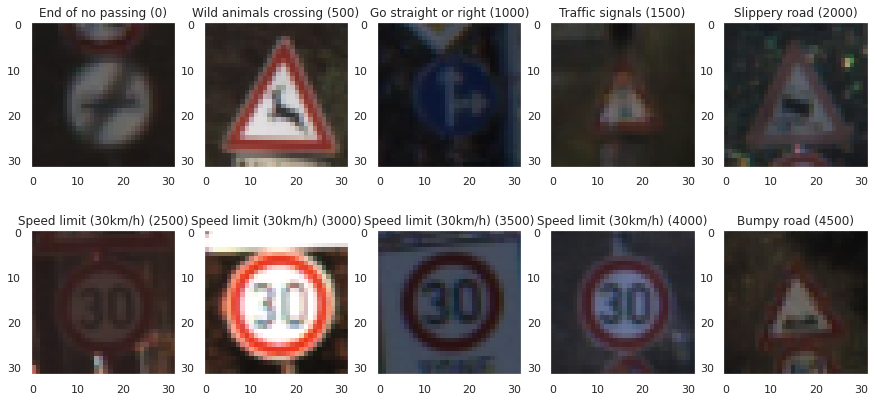

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

# Create a dict mapping the number of class to the name
df = pd.read_csv("signnames.csv")
df.set_index('ClassId', inplace=True)
labels_dict = df.to_dict()['SignName']

# Count the frequency of each class in the dataset
unique, counts = np.unique(y_train, return_counts=True)
train_freq = np.asarray((unique, counts)).T

unique, counts = np.unique(y_test, return_counts=True)
test_freq = np.asarray((unique, counts)).T

unique, counts = np.unique(y_valid, return_counts=True)
valid_freq = np.asarray((unique, counts)).T

# Plot
plt.figure(figsize=(15,5))
plt.title("Train Data Sign Count")
plt.bar(train_freq[:, 0], train_freq[:, 1])
plt.show()

plt.figure(figsize=(15,5))
plt.title("Valid Data Sign Count")
plt.bar(valid_freq[:, 0], valid_freq[:, 1])
plt.show()

plt.figure(figsize=(15,5))
plt.title("Test Data Sign Count")
plt.bar(test_freq[:, 0], test_freq[:, 1])
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(15,7))

idx = 0
for i in range(2):
    for j in range(5):
        image = X_train[idx]
        axes[i, j].grid(False)
        axes[i, j].set_title(labels_dict[y_train[idx]] + " (" + str(idx) + ")")
        axes[i, j].imshow(image)
        idx += 500
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. In this project, was used `pixel/255`, since it's a quick way to approximately normalize the data used in this project. 

In [4]:
from sklearn.utils import shuffle
import tensorflow as tf

X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

X_train.shape

(34799, 32, 32, 3)

### Model Architecture

In [5]:
from tensorflow.keras import layers, models, losses, optimizers

def LeNet():
    model = models.Sequential()

    model.add(layers.Conv2D(6, 5, activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.MaxPooling2D(2))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(120, 5, activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(43, activation='softmax'))

    return model

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
EPOCHS = 100
BATCH_SIZE = 32
optimizer = optimizers.Adam(lr=0.002)

model = LeNet()
model.summary()

model.compile(optimizer=optimizer,
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.0005)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                            filepath="models/best_model.h5",
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reduce_lr, early_stopping_callback, model_checkpoint_callback],
                    validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

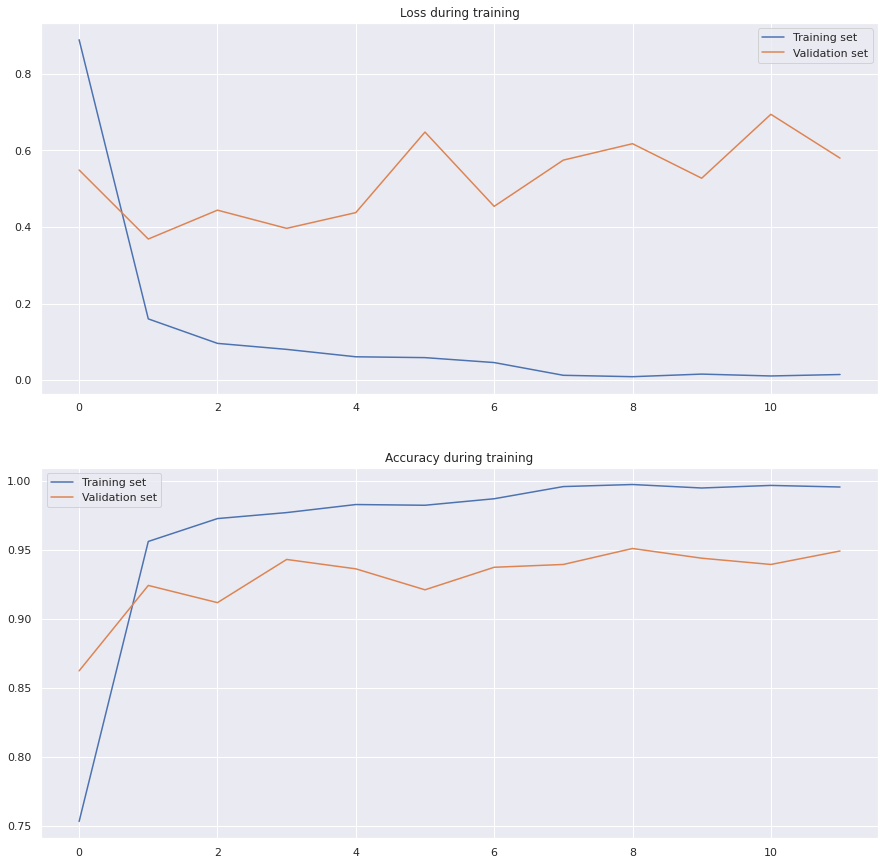

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Loss during training')
axs[0].legend(['Training set', 'Validation set'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Accuracy during training')
axs[1].legend(['Training set', 'Validation set'])

plt.show()

## Evaluate model performance on Test set

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)

395/395 [==============================] - 4s 11ms/step - loss: 0.6416 - accuracy: 0.9336


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [9]:
import os
import csv
import cv2

# Load sign names
with open("signnames.csv", mode='r') as file:
    reader = csv.reader(file)
    sign_names = {int(row[0]): row[1] for row in reader if row[0] != "ClassId"}

# Load test images
test_images_folder = "test_images"
test_images    = []
test_images_tf = []
images_class   = []
for image_name in os.listdir(test_images_folder):
    image = cv2.imread(os.path.join(test_images_folder, image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_class = int(image_name.split("_")[0])
    
    test_images.append(image)
    test_images_tf.append(np.expand_dims(image, axis=0))
    images_class.append(image_class)

### Predict the Sign Type for Each Image

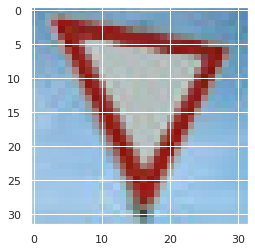

Class name : Yield
Predicted  : Yield


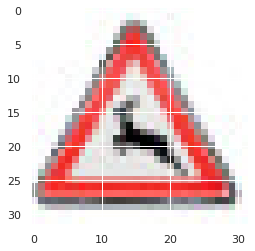

Class name : Wild animals crossing
Predicted  : Wild animals crossing


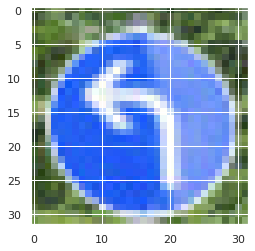

Class name : Turn left ahead
Predicted  : Turn left ahead


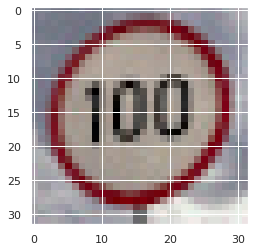

Class name : Speed limit (100km/h)
Predicted  : Dangerous curve to the right


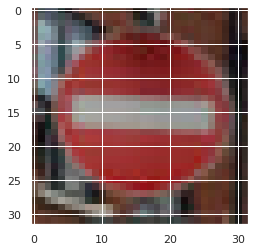

Class name : No entry
Predicted  : No entry


In [10]:
def predict(image):
    image = image/255.0

    predicted_class_id = np.argmax(model.predict(image))
    predicted_class_name = sign_names[predicted_class_id]
                         
    return predicted_class_id, predicted_class_name

for image, image_tf, image_class_id in zip(test_images, test_images_tf, images_class):
    image_class_name = sign_names[image_class_id]
    predicted_class_id, predicted_class_name = predict(image_tf)
    
    # Plot images
    plt.imshow(image)
    plt.show()
    print("Class name : {}\nPredicted  : {}".format(image_class_name, predicted_class_name))

### Analyze Performance

In [11]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

correct_predictions = 0
for image_tf, image_class_id in zip(test_images_tf, images_class):
    predicted_class_id, _ = predict(image_tf)
    
    if image_class_id == predicted_class_id:
        correct_predictions += 1

accuracy = (correct_predictions/len(test_images)) * 100.0

print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 80.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

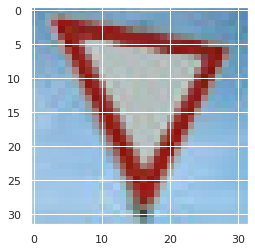

Class name: Yield                                              Probability: 1.0000000000
Class name: Speed limit (20km/h)                               Probability: 0.0000000000
Class name: Speed limit (30km/h)                               Probability: 0.0000000000
Class name: Speed limit (50km/h)                               Probability: 0.0000000000
Class name: Speed limit (60km/h)                               Probability: 0.0000000000


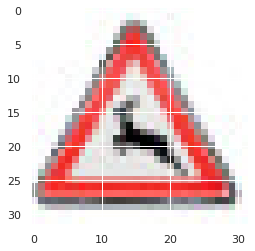

Class name: Wild animals crossing                              Probability: 1.0000000000
Class name: Right-of-way at the next intersection              Probability: 0.0000000276
Class name: Double curve                                       Probability: 0.0000000000
Class name: Speed limit (80km/h)                               Probability: 0.0000000000
Class name: Speed limit (60km/h)                               Probability: 0.0000000000


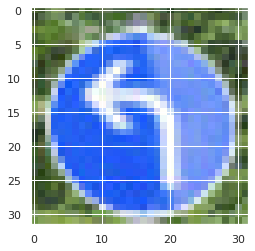

Class name: Turn left ahead                                    Probability: 1.0000000000
Class name: Ahead only                                         Probability: 0.0000000031
Class name: Keep right                                         Probability: 0.0000000000
Class name: Go straight or right                               Probability: 0.0000000000
Class name: General caution                                    Probability: 0.0000000000


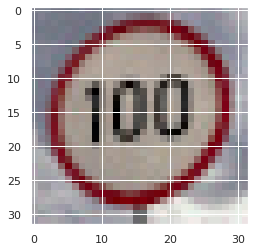

Class name: Dangerous curve to the right                       Probability: 0.6096363068
Class name: End of no passing                                  Probability: 0.2069590539
Class name: Slippery road                                      Probability: 0.1833073348
Class name: Speed limit (80km/h)                               Probability: 0.0000971159
Class name: Vehicles over 3.5 metric tons prohibited           Probability: 0.0000001802


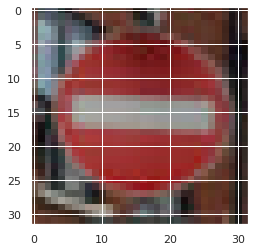

Class name: No entry                                           Probability: 1.0000000000
Class name: No passing                                         Probability: 0.0000000000
Class name: No vehicles                                        Probability: 0.0000000000
Class name: Speed limit (20km/h)                               Probability: 0.0000000000
Class name: Speed limit (60km/h)                               Probability: 0.0000000000


In [12]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k = 5

for image, image_tf, image_class_id in zip(test_images, test_images_tf, images_class):
    image_tf = image_tf/255.0
    
    prediction = model.predict(image_tf)[0]
    probabilities, classes_id = tf.nn.top_k(prediction, k=top_k)
    probabilities, classes_id = probabilities.numpy(), classes_id.numpy()
    classes_name = [sign_names[class_id] for class_id in classes_id]
    
    # Plot images
    plt.imshow(image)
    plt.show()
    for probability, class_name in zip(probabilities, classes_name):
        print("Class name: {:<51}Probability: {:.10f}".format(class_name, probability))